In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import collections

In [2]:
df1 = pd.read_csv('train.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32978 entries, 0 to 32977
Data columns (total 22 columns):
id                32978 non-null int64
age               32978 non-null int64
job               32978 non-null object
marital           32978 non-null object
education         32978 non-null object
default           32978 non-null object
housing           32978 non-null object
loan              32978 non-null object
contact           32978 non-null object
month             32978 non-null object
day_of_week       32978 non-null object
duration          32978 non-null int64
campaign          32978 non-null int64
pdays             32978 non-null int64
previous          32978 non-null int64
poutcome          32978 non-null object
emp.var.rate      32978 non-null float64
cons.price.idx    32978 non-null float64
cons.conf.idx     32978 non-null float64
euribor3m         32978 non-null float64
nr.employed       32978 non-null float64
y                 32978 non-null object
dtypes: floa

In [4]:
df1.describe()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000
mean,20620.844533,40.042392,258.808145,2.563376,961.752471,0.174480,0.079562,93.574961,-40.508163,3.618474,5166.942198
std,11878.692749,10.466038,259.565427,2.770355,188.683048,0.497501,1.571342,0.579191,4.633056,1.735421,72.341606
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10346.250000,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20649.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30887.750000,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


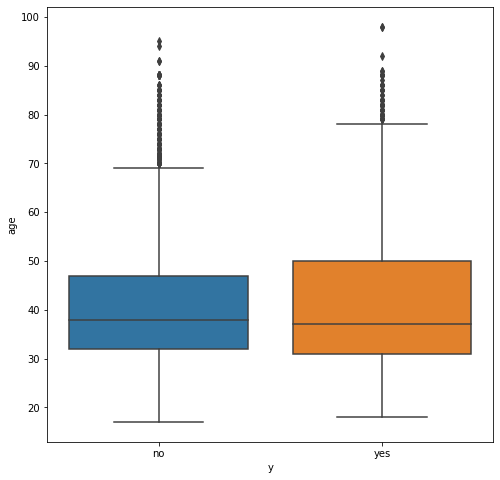

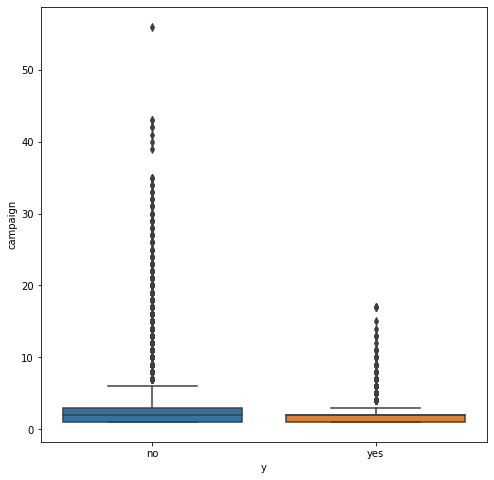

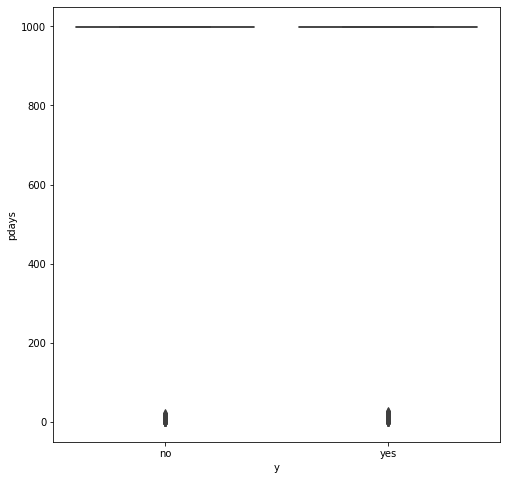

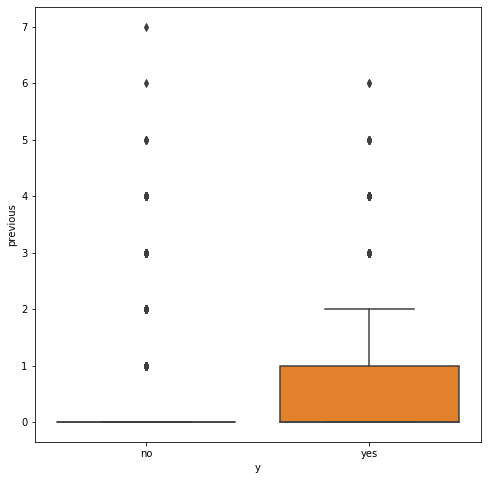

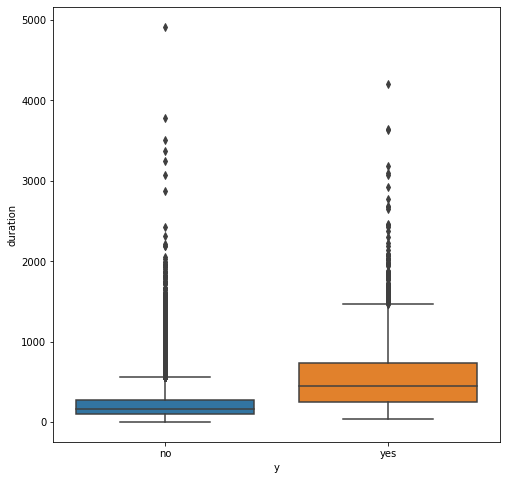

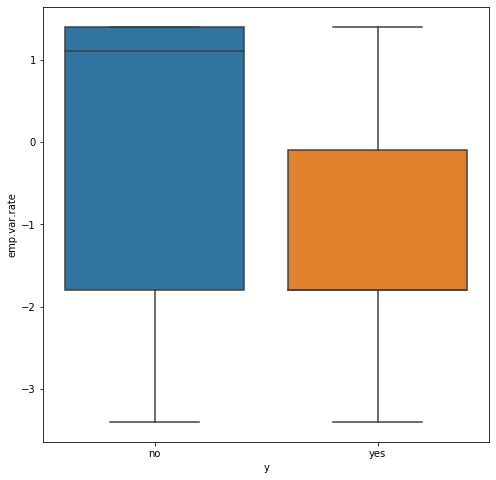

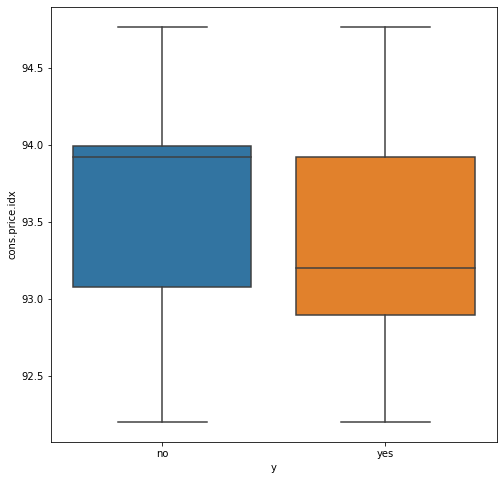

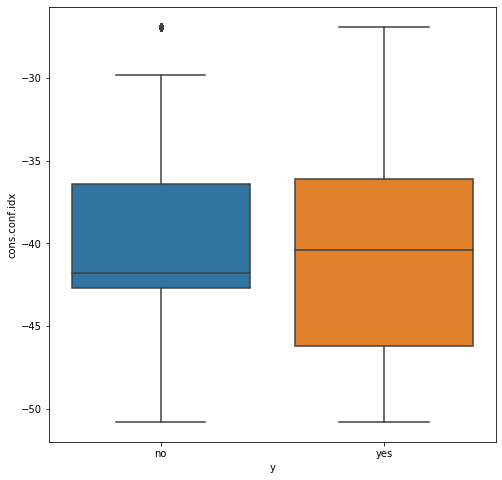

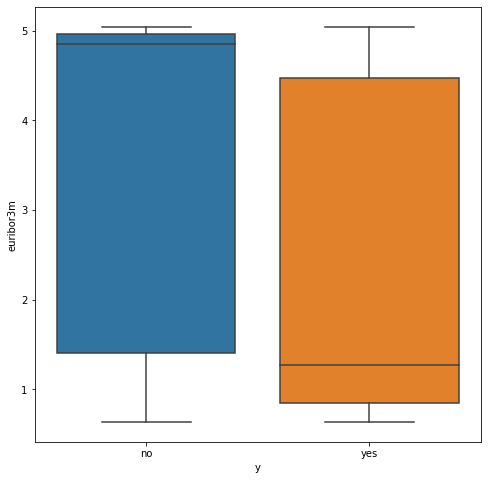

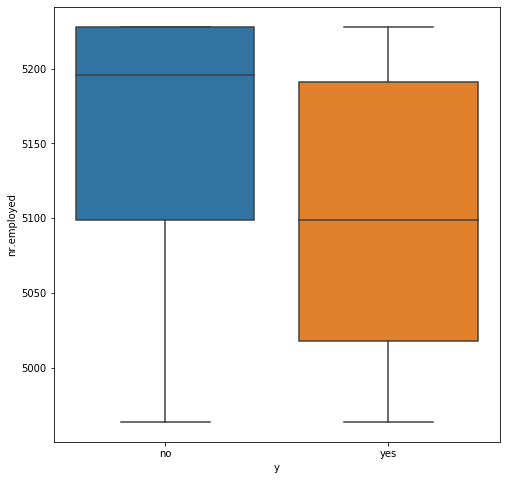

In [5]:
numeric_vars=["age", "campaign", "pdays", "previous", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
categorical_vars=[i for i in df1.columns if i not in numeric_vars]
categorical_vars.remove("y")
target="y"

for i in numeric_vars:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=target,y=i,data=df1)
    plt.show()

age


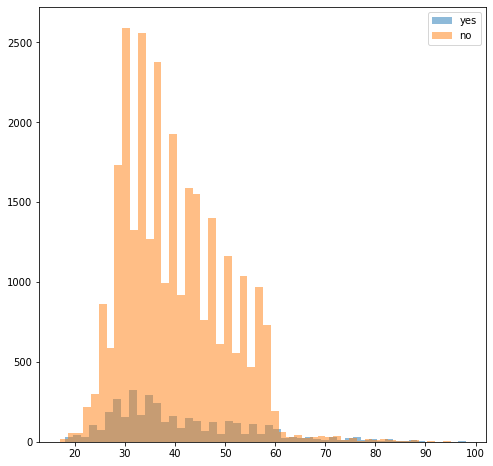

campaign


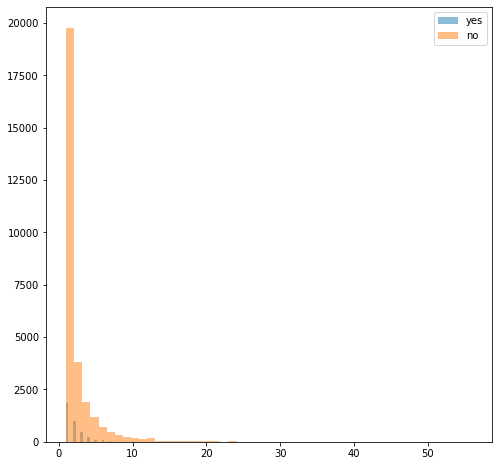

pdays


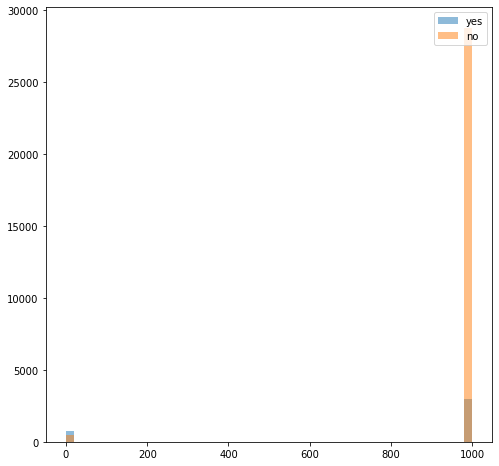

previous


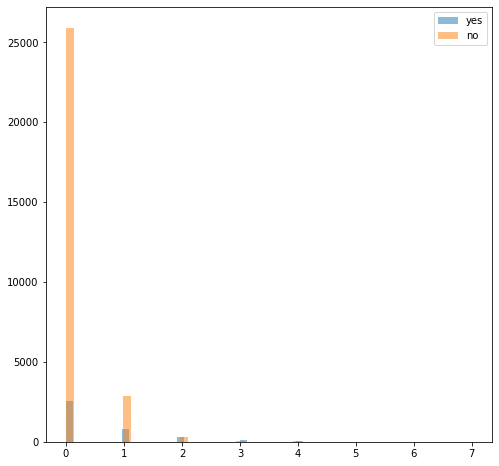

duration


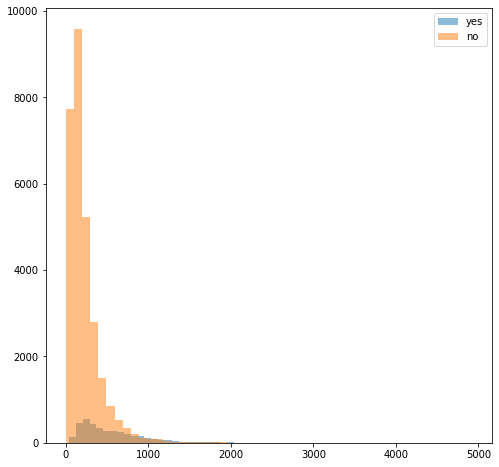

emp.var.rate


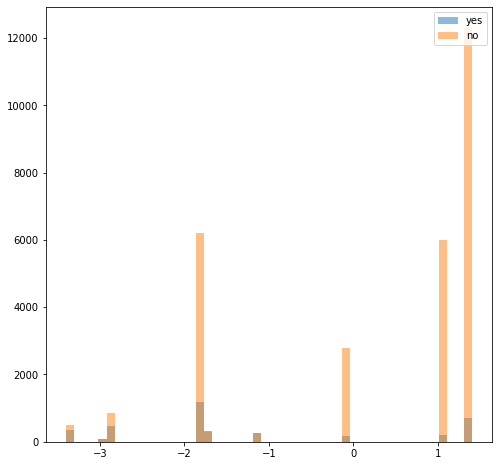

cons.price.idx


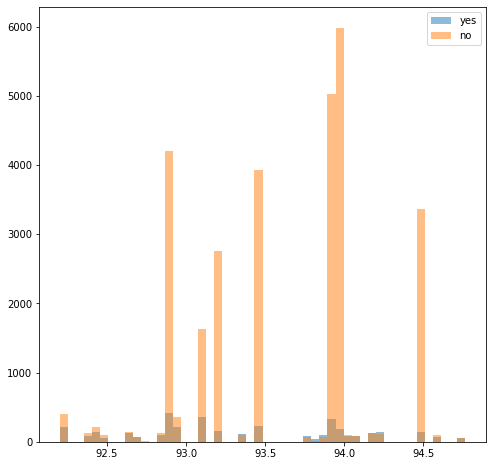

cons.conf.idx


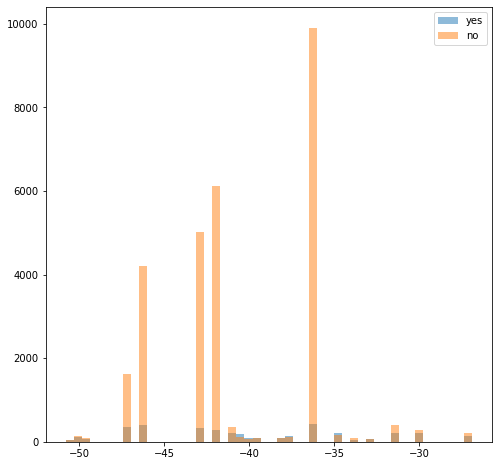

euribor3m


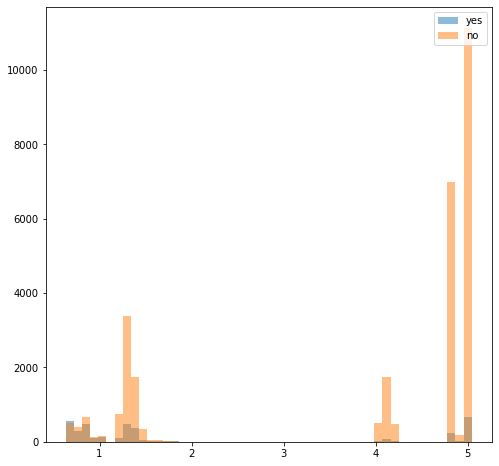

nr.employed


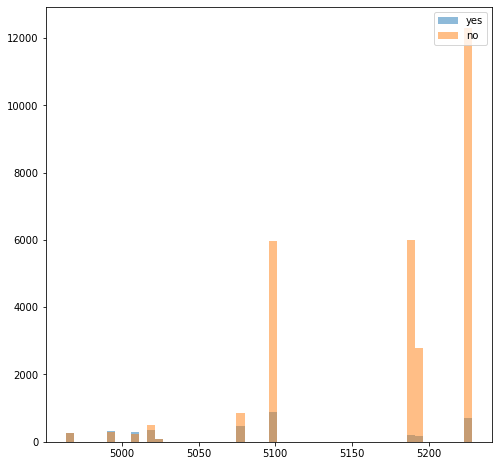

In [6]:
bins=50
for i in numeric_vars:
    plt.figure(figsize=(8,8))
    pyplot.hist(df1[df1["y"]=="yes"][i].values, bins, alpha=0.5, label='yes', )
    pyplot.hist(df1[df1["y"]=="no"][i].values, bins, alpha=0.5, label='no')
    pyplot.legend(loc='upper right')
    print(i)
    pyplot.show()

The categorical histogram plots show that the the distribution are similar or different here we see that age and emp.varrate have same categorical plots and The categorical histograms show distribution.

The pdays attribute can be removed as it has all the variables with nearly same attribute value..

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder()
enc.fit(df1[categorical_vars])
tr=enc.transform(df1[categorical_vars]).toarray()

enc_col=[str(i) for i in range(tr.shape[1])]
for no,i in enumerate(enc_col):
    df1[i]=tr[:,no]

In [ ]:
df1=df1.drop(categorical_vars,axis=1)
df1=df1.drop("pdays",axis=1)
numeric_vars.remove("pdays")

In [ ]:
for i in range(len(numeric_vars)):
    for j in range(i+1,len(numeric_vars)):  
        sns.lmplot(x=numeric_vars[i],y=numeric_vars[j],hue=target,data=df1)
        plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr())
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df1["y"]=[1 if i=="yes" else 0 for i in df1["y"]]

In [ ]:
X = df1[[i for i in df1.columns if i != "y"]]  #independent columns
y = df1["y"]    #target column i.e price range

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
df_select=df1[feat_importances.nlargest(20).index.values]
df_select["y"]=df1["y"]
X=df_select[[i for i in df_select.columns if i != "y"]].values
y=df_select["y"].values

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#split dataset into train and test data according to stratification..
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.metrics import accuracy_score

for i in range(10,400,10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)

    print(accuracy_score(neigh.predict(X_test),y_test))

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = .1,
                                                  random_state=12)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics
#applying somte for oversampling...
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

In [ ]:
print('Validation Results')
print(clf_rf.score(x_val, y_val))

In [ ]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='logloss', early_stopping_rounds=early_stopping_rounds,verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print(metrics.classification_report(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.feature_importances_).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()

In [ ]:
predictors = [x for x in df_select.columns if x not in [target]]
df_res=pd.DataFrame(x_train_res,columns=predictors)
df_res["y"]=y_train_res

In [ ]:
xgb1= XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, df_res, predictors)

In [ ]:
print('Validation Results')

dtest_predictions = xgb1.predict(pd.DataFrame(x_val,columns=predictors))
dtest_predprob = xgb1.predict_proba(pd.DataFrame(x_val,columns=predictors))[:,1]

print(metrics.classification_report(y_val, dtest_predictions))